In [8]:
import pandas as pd
import numpy as np
import json
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from pprint import pprint

pd.set_option("display.max_rows",6)

%matplotlib inline

In [9]:
# analysis of entire data set
df_train_data = pd.read_csv('varsom_numdata.csv', index_col=0)

In [10]:
# used to train and test
"""
df_train_data = pd.read_csv('varsom_train_data.csv', index_col=0)
df_test_data = pd.read_csv('varsom_test_data.csv', index_col=0)

df_train_target = pd.read_csv('varsom_train_target.csv', index_col=0)
df_test_target = pd.read_csv('varsom_test_target.csv', index_col=0)
"""

"\ndf_train_data = pd.read_csv('varsom_train_data.csv', index_col=0)\ndf_test_data = pd.read_csv('varsom_test_data.csv', index_col=0)\n\ndf_train_target = pd.read_csv('varsom_train_target.csv', index_col=0)\ndf_test_target = pd.read_csv('varsom_test_target.csv', index_col=0)\n"

In [11]:
df_train_data.head(5)

AvalancheProblems_0_AvalProbabilityId  \
index                                          
0                                          3   
1                                          3   
2                                          3   
3                                          3   
4                                          3   

       AvalancheProblems_0_Class_AvalDistributionId  \
index                                                 
0                                                 2   
1                                                 2   
2                                                 2   
3                                                 2   
4                                                 2   

       AvalancheProblems_0_AvalTriggerSimpleId  \
index                                            
0                                           10   
1                                           10   
2                                           10   
3                                           10   
4                                           21   

       AvalancheProblems_0_AvalancheProblemId  \
index                                           
0                                           1   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

       AvalancheProblems_0_Class_AvalancheProblemTypeId  \
index                                                     
0                                                     6   
1                                                     6   
2                                                     6   
3                                                     6   
4                                                     5   

       AvalancheProblems_0_AvalancheTypeId  \
index                                        
0                                       10   
1                                       10   
2                                       10   
3                                       10   
4                                       10   

       AvalancheProblems_0_DestructiveSizeExtId  \
index                                             
0                                             2   
1                                             2   
2                                             2   
3                                             2   
4                                             2   

       AvalancheProblems_1_AvalProbabilityId  \
index                                          
0                                        0.0   
1                                        3.0   
2                                        0.0   
3                                        0.0   
4                                        3.0   

       AvalancheProblems_1_Class_AvalDistributionId  \
index                                                 
0                                                 0   
1                                                 2   
2                                                 0   
3                                                 0   
4                                                 2   

       AvalancheProblems_1_AvalTriggerSimpleId         ...           \
index                                                  ...            
0                                          0.0         ...            
1                                         10.0         ...            
2                                          0.0         ...            
3                                          0.0         ...            
4                                         21.0         ...            

       DangerLevel            ValidFrom  Rainfall_Most_exposed_area  \
index                                                                 
0                2  2017-12-01T00:00:00                           0   
1                2  2017-12-02T00:00:00                     

In [12]:
df_train_data.columns.values

array(['AvalancheProblems_0_AvalProbabilityId',
       'AvalancheProblems_0_Class_AvalDistributionId',
       'AvalancheProblems_0_AvalTriggerSimpleId',
       'AvalancheProblems_0_AvalancheProblemId',
       'AvalancheProblems_0_Class_AvalancheProblemTypeId',
       'AvalancheProblems_0_AvalancheTypeId',
       'AvalancheProblems_0_DestructiveSizeExtId',
       'AvalancheProblems_1_AvalProbabilityId',
       'AvalancheProblems_1_Class_AvalDistributionId',
       'AvalancheProblems_1_AvalTriggerSimpleId',
       'AvalancheProblems_1_AvalancheProblemId',
       'AvalancheProblems_1_Class_AvalancheProblemTypeId',
       'AvalancheProblems_1_AvalancheTypeId',
       'AvalancheProblems_1_DestructiveSizeExtId', 'DangerLevel',
       'ValidFrom', 'Rainfall_Most_exposed_area', 'Rainfall_Average',
       'Wind_Speed_Num', 'Wind_Direction_Num', 'Temperature_Min',
       'Temperature_Max', 'Temperature_masl', 'Freezing_Level_masl'],
      dtype=object)

In [13]:
# Check if there are no weired values.
for col in df_train_data.drop(['ValidFrom'], axis=1).columns.values:
    print(col, ': ', df_train_data[col].unique())

AvalancheProblems_0_AvalProbabilityId :  [3 2 5]
AvalancheProblems_0_Class_AvalDistributionId :  [2 3 1]
AvalancheProblems_0_AvalTriggerSimpleId :  [10 21 22]
AvalancheProblems_0_AvalancheProblemId :  [1 2 3]
AvalancheProblems_0_Class_AvalancheProblemTypeId :  [6 5 7 4 2]
AvalancheProblems_0_AvalancheTypeId :  [10 20]
AvalancheProblems_0_DestructiveSizeExtId :  [2 1 3]
AvalancheProblems_1_AvalProbabilityId :  [0. 3. 2. 5.]
AvalancheProblems_1_Class_AvalDistributionId :  [0 2 1 3]
AvalancheProblems_1_AvalTriggerSimpleId :  [ 0. 10. 21. 22.]
AvalancheProblems_1_AvalancheProblemId :  [0. 2. 1. 3.]
AvalancheProblems_1_Class_AvalancheProblemTypeId :  [0 7 4 6 5 2]
AvalancheProblems_1_AvalancheTypeId :  [ 0. 10. 20.]
AvalancheProblems_1_DestructiveSizeExtId :  [0. 2. 1. 3.]
DangerLevel :  [2 3 1]
Rainfall_Most_exposed_area :  [ 0  6 15  7 16 25 20 30  2  4  3 45 10  5 12 14  1  8 18 50  9 35 40 13]
Rainfall_Average :  [ 0  2  1  5  8 10 12 30 20  4 15 18  3  6 25 14  9 16]
Wind_Speed_Num :  

In [14]:
# Remove the "2|" in column Rainfall_Average
df_train_data = df_train_data[df_train_data['Rainfall_Average'] != '2|']        
print(df_train_data['Rainfall_Average'].unique())

C:\Anaconda3\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

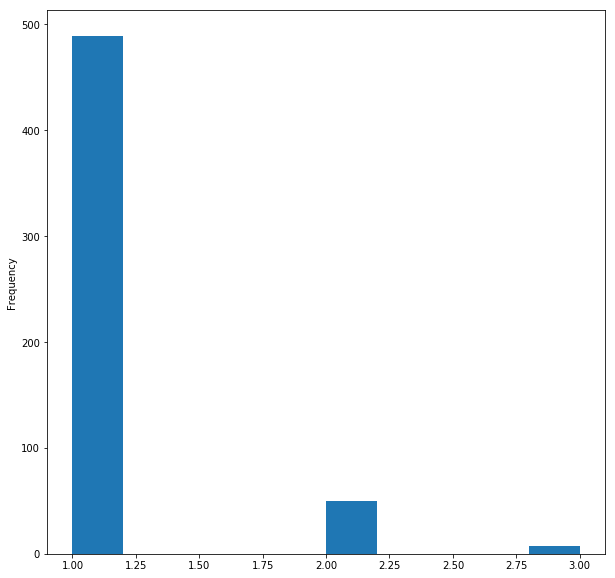

In [15]:
#df_train_data.plot(x='ValidFrom', y='AvalancheProblems_0_AvalancheProblemId', figsize=(16,10), kind='bar')
df_train_data['AvalancheProblems_0_AvalancheProblemId'].plot(figsize=(10,10), kind='hist')
#df_train_data.plot(subplots=True, figsize=(16,20))

In [16]:
df_train_target = df_train_data.filter(['DangerLevel'], axis=1)
df_train_data = df_train_data.drop(['DangerLevel'], axis=1)

data = np.array(df_train_data.drop(['ValidFrom'], axis=1).values, dtype=float)
target = np.array(df_train_target.values, dtype=float)
print(df_train_data.drop(['ValidFrom'], axis=1).columns.values,
     df_train_target.columns.values)


['AvalancheProblems_0_AvalProbabilityId'
 'AvalancheProblems_0_Class_AvalDistributionId'
 'AvalancheProblems_0_AvalTriggerSimpleId'
 'AvalancheProblems_0_AvalancheProblemId'
 'AvalancheProblems_0_Class_AvalancheProblemTypeId'
 'AvalancheProblems_0_AvalancheTypeId'
 'AvalancheProblems_0_DestructiveSizeExtId'
 'AvalancheProblems_1_AvalProbabilityId'
 'AvalancheProblems_1_Class_AvalDistributionId'
 'AvalancheProblems_1_AvalTriggerSimpleId'
 'AvalancheProblems_1_AvalancheProblemId'
 'AvalancheProblems_1_Class_AvalancheProblemTypeId'
 'AvalancheProblems_1_AvalancheTypeId'
 'AvalancheProblems_1_DestructiveSizeExtId' 'Rainfall_Most_exposed_area'
 'Rainfall_Average' 'Wind_Speed_Num' 'Wind_Direction_Num'
 'Temperature_Min' 'Temperature_Max' 'Temperature_masl'
 'Freezing_Level_masl'] ['DangerLevel']


In [19]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=8)
clf = clf.fit(data, target)

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names = df_train_data.drop(['ValidFrom'], axis=1).columns.values,
                                class_names = ['low', 'moderate', 'considerable', 'high'],
                                #proportion = True, # show precentages instead of members
                                label = "root",
                                filled=True, rounded=True, special_characters=True                                
                                )
graph = graphviz.Source(dot_data) 
graph.render("varsom") 

'varsom.pdf'

## Same, but with DecisionTreeRegressor

In [ ]:
clf2 = tree.DecisionTreeRegressor()
clf2 = clf2.fit(data, target)

dot_data2 = tree.export_graphviz(clf2, out_file=None,
                                feature_names = df_train_data.drop(['ValidFrom', 'ValidTo'], axis=1).columns.values,
                                filled=True, rounded=True, special_characters=True                                
                                )
graph2 = graphviz.Source(dot_data2) 
graph2.render("varsom_reg") 

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target_names

In [ ]:
iris.target